In [4]:
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import random

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [7]:
(images, labels), (test_images, test_labels) = mnist.load_data()
#print(images)
print(labels)

[5 0 4 ... 5 6 8]


In [3]:
images.shape

(60000, 28, 28)

In [4]:
labels.shape

(60000,)

In [5]:
labels.min(), labels.max()

(0, 9)

# CNN

In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [2]:
inp = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
#se manda todo a una capa densa como una red neuronal normal
x = Dense(32, activation="relu")(x)
outputs = Dense(10, activation="softmax")(x)
model = Model(inputs=inp, outputs=outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,394 (118.73 KB)

 Trainable params: 30,394 (118.73 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
print(images)

X_train, X_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.1, random_state=42)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

hst = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid), callbacks=[early_stop])

Epoch 1/60
1688/1688 [==============================] - 60s 34ms/step - loss: 0.4162 - accuracy: 0.9072 - val_loss: 0.1306 - val_accuracy: 0.9608
Epoch 2/60
1688/1688 [==============================] - 47s 28ms/step - loss: 0.0913 - accuracy: 0.9718 - val_loss: 0.0823 - val_accuracy: 0.9768
Epoch 3/60
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0640 - accuracy: 0.9806 - val_loss: 0.0715 - val_accuracy: 0.9808
Epoch 4/60
1688/1688 [==============================] - 46s 28ms/step - loss: 0.0504 - accuracy: 0.9839 - val_loss: 0.0551 - val_accuracy: 0.9830
Epoch 5/60
1688/1688 [==============================] - 49s 29ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0700 - val_accuracy: 0.9817
Epoch 6/60
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0617 - val_accuracy: 0.9828
Epoch 7/60
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.0596 -

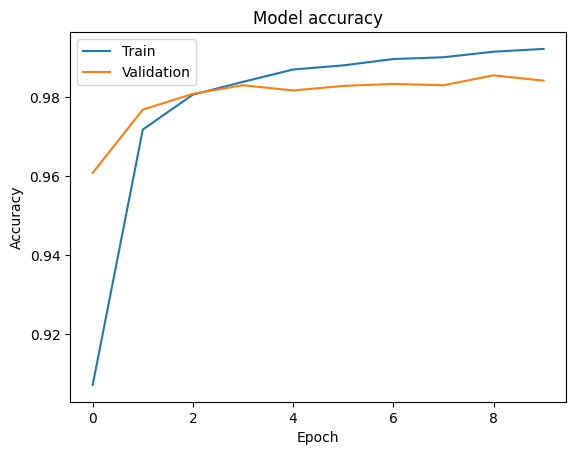

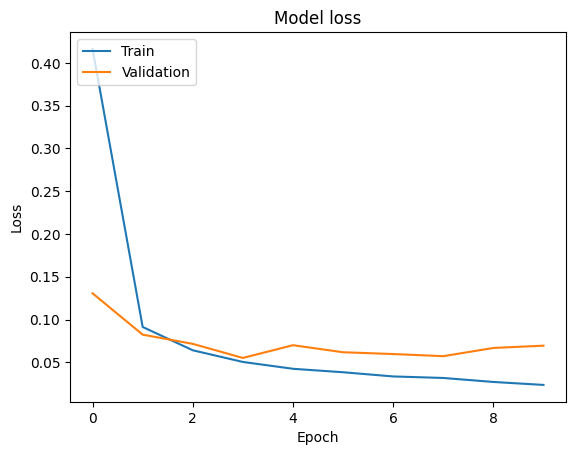

In [ ]:
plt.plot(hst.history['accuracy'])
plt.plot(hst.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hst.history['loss'])
plt.plot(hst.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
preds = np.argmax(model.predict(test_images), axis=1)
preds.shape

313/313 [==============================] - 2s 8ms/step


(10000,)

In [ ]:
accuracy_score(test_labels, preds)

0.9849

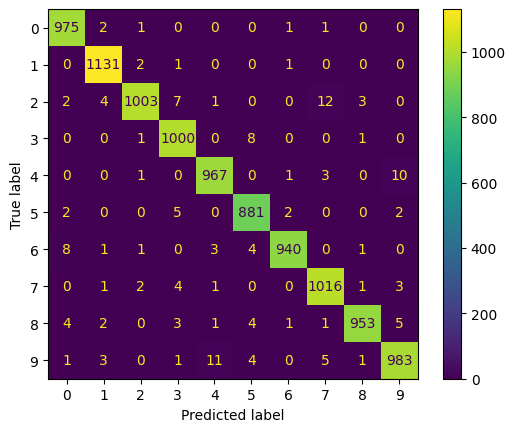

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(test_labels, preds)).plot()
